In [5]:
#loading modules
import pandas as pd
import numpy as np

#visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#loading Data the dataset
print("Loading Data")
df=pd.read_csv("/Users/barsa/Downloads/Uber-Jan-Feb-FOIL.csv")

Loading Data


In [7]:
df.head(2)

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765


In [9]:
df.tail(2)

,dispatching_base_number,date,active_vehicles,trips
352,B02512,2/28/2015,230,1803
353,B02765,2/28/2015,747,7753


In [11]:
df.columns

Index(['dispatching_base_number', 'date', 'active_vehicles', 'trips'], dtype='object')

This dataset contains 354 entries and the following columns:

dispatching_base_number (object): Identifies the dispatching base.

Date (datetime): The date of the trip data.

active_vehicles (int): Number of active vehicles on that day.

trips (int): Number of trips completed on that day.

Month (object): Month name.

Weekday (object): Day of the week.

Day (int32): Day of the month.



In [27]:
df["dispatching_base_number"].value_counts()

dispatching_base_number
B02512    59
B02765    59
B02764    59
B02682    59
B02617    59
B02598    59
Name: count, dtype: int64

In [13]:
df.shape


(354, 4)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


In [33]:
print(df.isnull().sum())
print("\nThis dateset having no null value")

dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64

This dateset having no null value


In [35]:
#Renaming the Date/Time Column
df= df.rename(columns={"date":"Date"})

#Converting the date type into Datetime 
df["Date"]= pd.to_datetime(df["Date"])

#Adding coulmns
df["Month"]= df["Date"].dt.month_name()
df["Weekday"]= df["Date"].dt.day_name()
df["Day"]= df["Date"].dt.day

In [37]:
df.head(5)

,dispatching_base_number,Date,active_vehicles,trips,Month,Weekday,Day
0,B02512,2015-01-01,190,1132,January,Thursday,1
1,B02765,2015-01-01,225,1765,January,Thursday,1
2,B02764,2015-01-01,3427,29421,January,Thursday,1
3,B02682,2015-01-01,945,7679,January,Thursday,1
4,B02617,2015-01-01,1228,9537,January,Thursday,1


In [39]:
df.describe()

,Date,active_vehicles,trips,Day
count,354,354.000000,354.000000,354.000000
mean,2015-01-30 00:00:00,1307.435028,11667.316384,15.288136
min,2015-01-01 00:00:00,112.000000,629.000000,1.000000
25%,2015-01-15 00:00:00,296.750000,2408.500000,8.000000
50%,2015-01-30 00:00:00,1077.000000,9601.000000,15.000000
75%,2015-02-14 00:00:00,1417.000000,13711.250000,23.000000
max,2015-02-28 00:00:00,4395.000000,45858.000000,31.000000
std,NaN,1162.510626,10648.284865,8.588913


In [41]:
df.describe(include="all")

,dispatching_base_number,Date,active_vehicles,trips,Month,Weekday,Day
count,354,354,354.000000,354.000000,354,354,354.000000
unique,6,NaN,NaN,NaN,2,7,NaN
top,B02512,NaN,NaN,NaN,January,Thursday,NaN
freq,59,NaN,NaN,NaN,186,54,NaN
mean,NaN,2015-01-30 00:00:00,1307.435028,11667.316384,NaN,NaN,15.288136
min,NaN,2015-01-01 00:00:00,112.000000,629.000000,NaN,NaN,1.000000
25%,NaN,2015-01-15 00:00:00,296.750000,2408.500000,NaN,NaN,8.000000
50%,NaN,2015-01-30 00:00:00,1077.000000,9601.000000,NaN,NaN,15.000000
75%,NaN,2015-02-14 00:00:00,1417.000000,13711.250000,NaN,NaN,23.000000
max,NaN,2015-02-28 00:00:00,4395.000000,45858.000000,NaN,NaN,31.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   dispatching_base_number  354 non-null    object        
 1   Date                     354 non-null    datetime64[ns]
 2   active_vehicles          354 non-null    int64         
 3   trips                    354 non-null    int64         
 4   Month                    354 non-null    object        
 5   Weekday                  354 non-null    object        
 6   Day                      354 non-null    int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(3)
memory usage: 18.1+ KB


In [81]:
#=============Total Trips and Veheicals=============
total_trips = df['trips'].sum()
total_vehicles = df['active_vehicles'].sum()
print(f"\nTotal Trips: {total_trips:,}")
print(f"Total Active Vehicles: {total_vehicles:,}")
print(f"Average Trips per Day: {df['trips'].mean():.2f}")
print(f"Average Vehicles per Day: {df['active_vehicles'].mean():.2f}")
print(f"Total Unique Bases: {df["dispatching_base_number"].nunique()}")


Total Trips: 4,130,230
Total Active Vehicles: 462,832
Average Trips per Day: 11667.32
Average Vehicles per Day: 1307.44
Total Unique Bases: 6


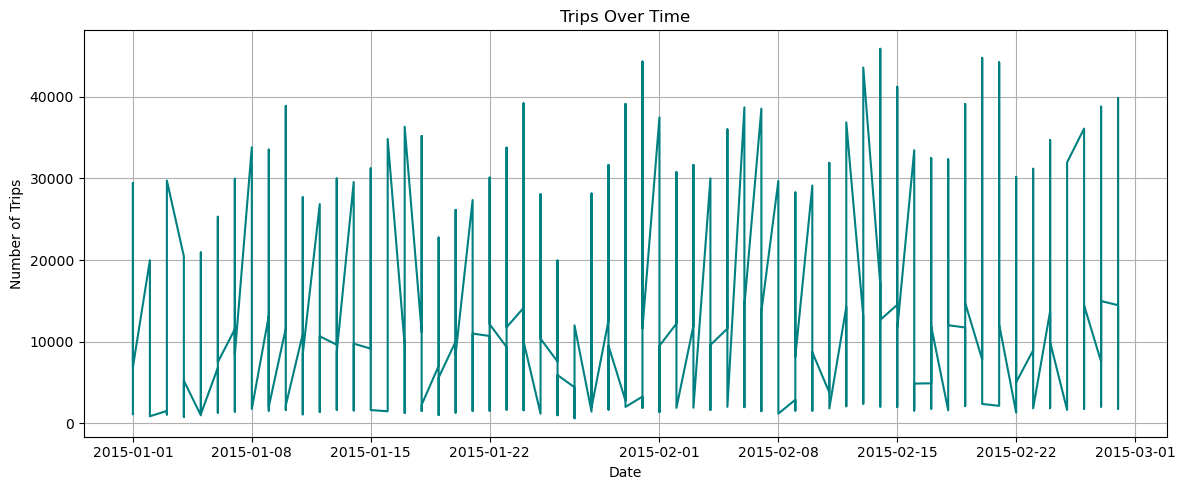

In [47]:
#==============Trips over Time===================
df.sort_values('Date', inplace=True)
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], df['trips'], label='Trips', color='teal')
plt.title('Trips Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.tight_layout()
plt.show()


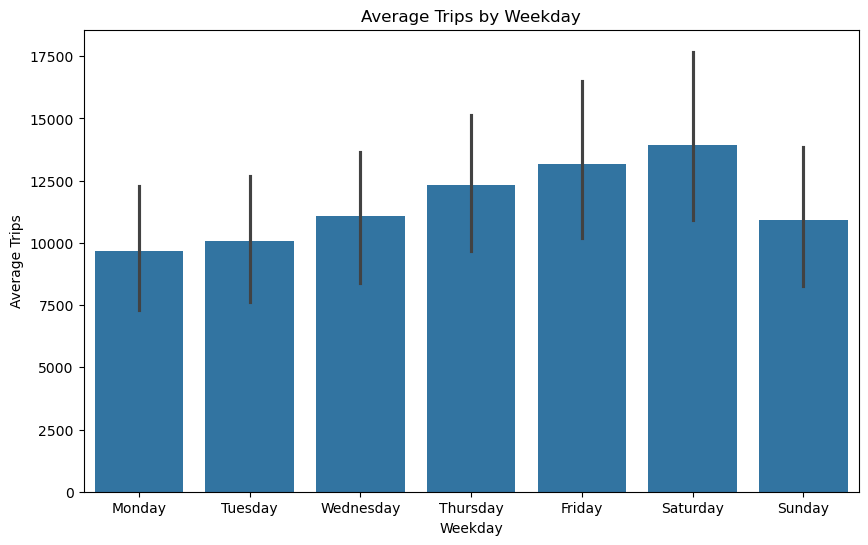

In [51]:
#===========Trips By weekday=============
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Weekday', y='trips', order=weekday_order, estimator='mean')
plt.title('Average Trips by Weekday')
plt.ylabel('Average Trips')
plt.show()


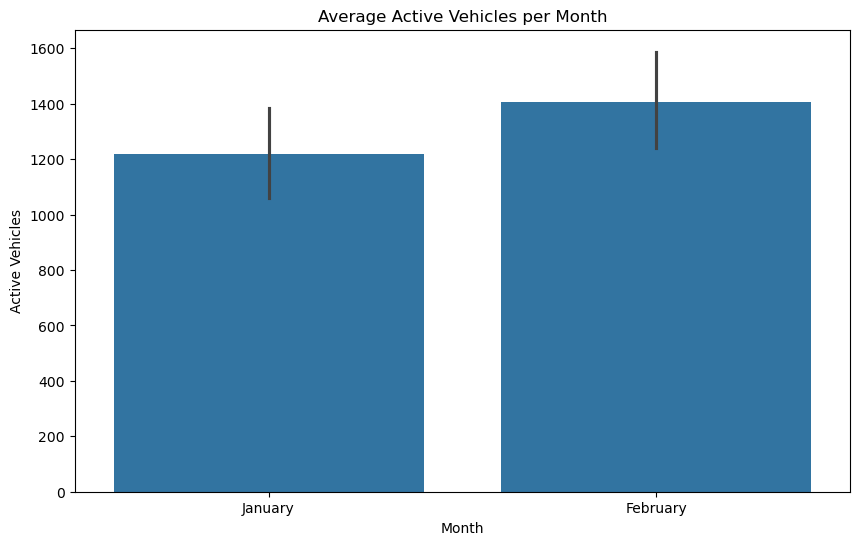

In [55]:
#===========Active Vehicles per Month============
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Month', y='active_vehicles', estimator='mean')
plt.title('Average Active Vehicles per Month')
plt.ylabel('Active Vehicles')
plt.xticks(rotation=0)
plt.show()


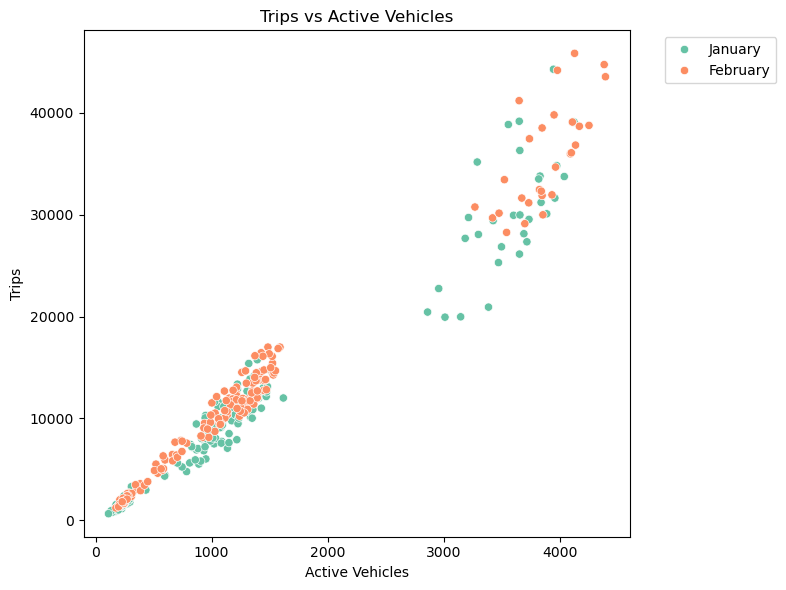

In [85]:
#==============Trips VS Active Vehicles===============
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='active_vehicles', y='trips', hue='Month',palette="Set2")
plt.title('Trips vs Active Vehicles')
plt.xlabel('Active Vehicles')
plt.ylabel('Trips')
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()


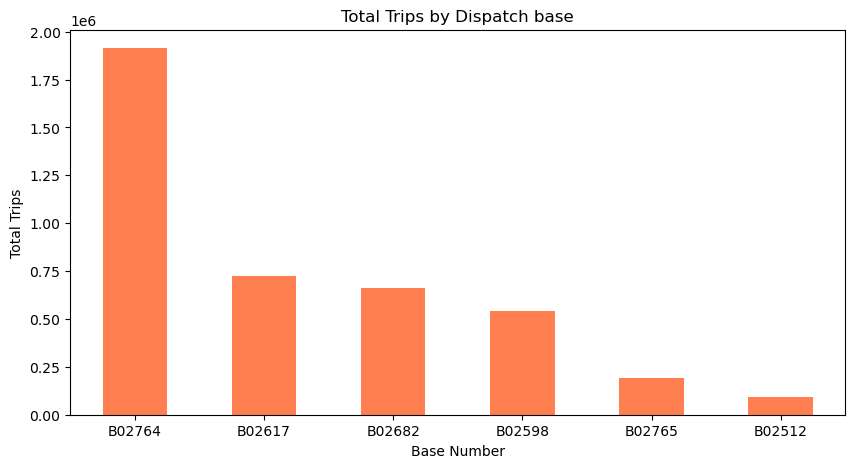

In [87]:
#===============Total Trips By Base=============
top_bases = df.groupby('dispatching_base_number')['trips'].sum().sort_values(ascending=False)
top_bases.plot(kind='bar', figsize=(10, 5), color='coral')
plt.title('Total Trips by Dispatch base')
plt.ylabel('Total Trips')
plt.xlabel('Base Number')
plt.xticks(rotation=0)
plt.show()


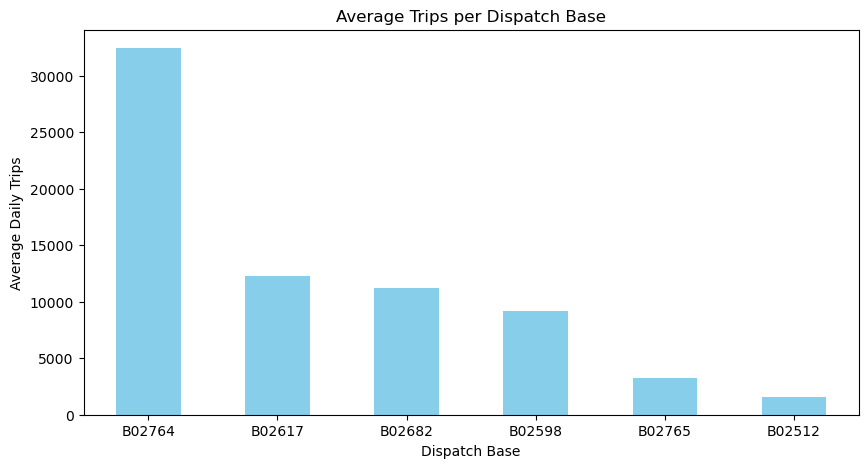

In [90]:
#============Average Trips per base===============
avg_trips_base = df.groupby('dispatching_base_number')['trips'].mean().sort_values(ascending=False)
avg_trips_base.plot(kind='bar', color='skyblue', figsize=(10, 5))
plt.title('Average Trips per Dispatch Base')
plt.ylabel('Average Daily Trips')
plt.xlabel('Dispatch Base')
plt.xticks(rotation=0)
plt.show()


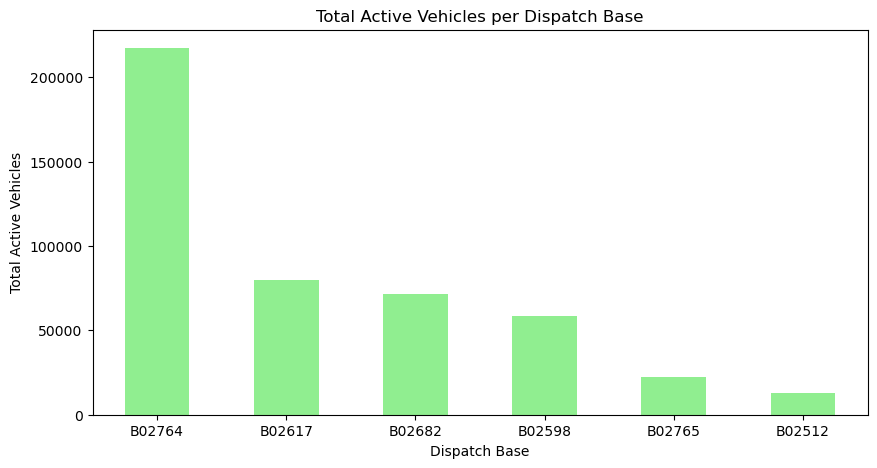

In [92]:
#============Total Active Vehicles By Base===========
total_vehicles_base = df.groupby('dispatching_base_number')['active_vehicles'].sum().sort_values(ascending=False)
total_vehicles_base.plot(kind='bar', color='lightgreen', figsize=(10, 5))
plt.title('Total Active Vehicles per Dispatch Base')
plt.ylabel('Total Active Vehicles')
plt.xlabel('Dispatch Base')
plt.xticks(rotation=0)
plt.show()


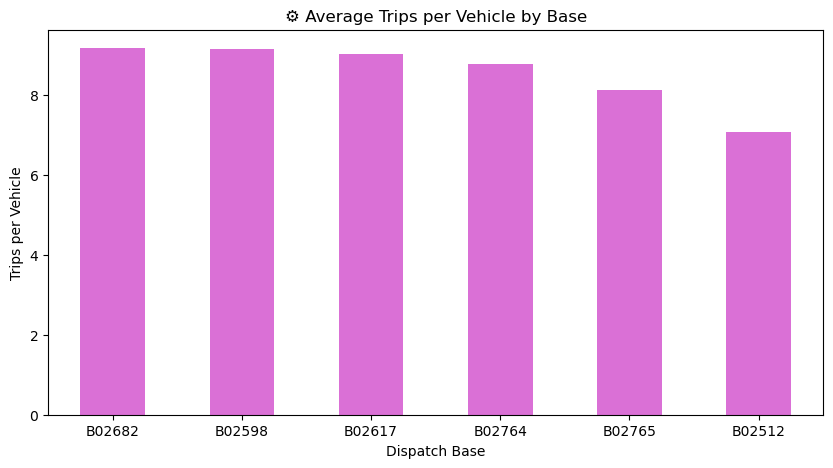

In [98]:
# =================== TRIPS PER VEHICLE PER BASE =====================
df['trips_per_vehicle'] = df['trips'] / df['active_vehicles']
avg_ratio = df.groupby('dispatching_base_number')['trips_per_vehicle'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
avg_ratio.plot(kind='bar', color='orchid')
plt.title('⚙️ Average Trips per Vehicle by Base')
plt.ylabel('Trips per Vehicle')
plt.xlabel('Dispatch Base')
plt.xticks(rotation=0)
plt.show()

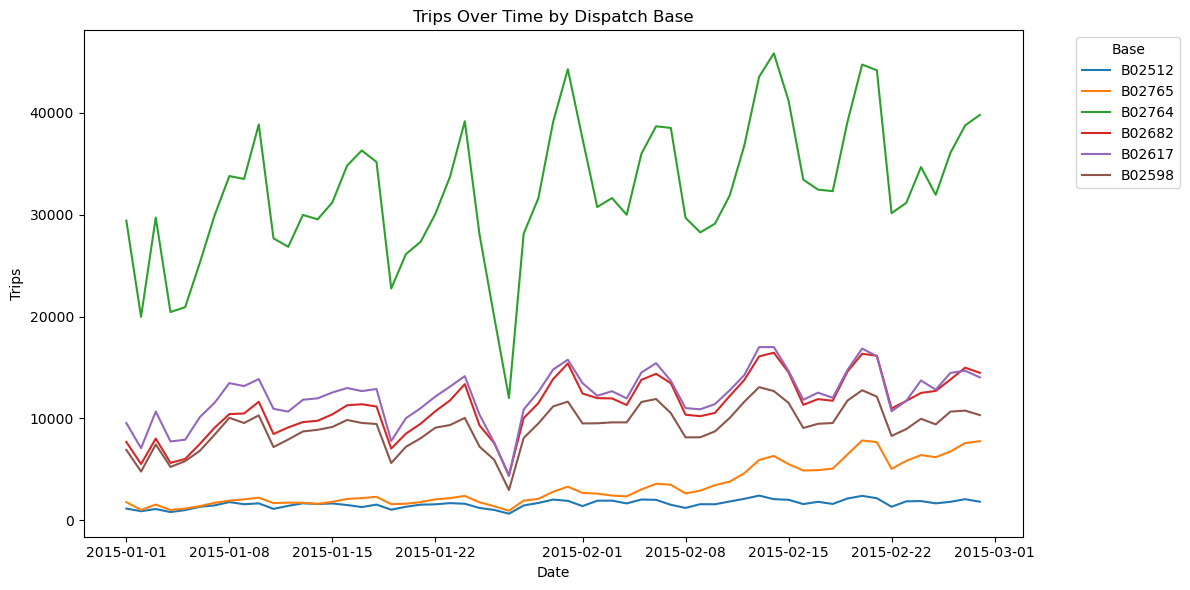

In [102]:
# =================== TRIPS BY BASE OVER TIME =====================
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='trips', hue='dispatching_base_number', palette='tab10')
plt.title('Trips Over Time by Dispatch Base')
plt.xlabel('Date')
plt.ylabel('Trips')
plt.legend(title='Base', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [104]:
# =================== INSIGHTS SUMMARY =====================
print("\n📌 Summary Insights:")
print("- Peak average trip day:", df.groupby("Weekday")["trips"].mean().idxmax())
print("- Lowest average trip day:", df.groupby("Weekday")["trips"].mean().idxmin())
print("- Month with highest average vehicles:", df.groupby("Month")["active_vehicles"].mean().idxmax())
print("- Base with highest total trips:", df.groupby('dispatching_base_number')['trips'].sum().idxmax())
print("- Base with most efficient (trips per vehicle):", avg_ratio.idxmax())


📌 Summary Insights:
- Peak average trip day: Saturday
- Lowest average trip day: Monday
- Month with highest average vehicles: February
- Base with highest total trips: B02764
- Base with most efficient (trips per vehicle): B02682
